# Exercise 6

## Question 1

Complete the following method to compute the modularity measure of a graph.

In [ ]:
## If you haven't installed networkx package, you can run the following command (note the exclamation mark)
## !conda install networkx --yes 

In [1]:
!conda install networkx --yes 

Solving environment: done

## Package Plan ##

  environment location: /Users/maxpfl/opt/anaconda3

  added / updated specs:
    - networkx


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.10.8          |   py38hecd8cb5_2         152 KB
    conda-4.11.0               |   py38hecd8cb5_0        14.4 MB
    openssl-1.1.1m             |       hca72f7f_0         2.2 MB
    ------------------------------------------------------------
                                           Total:        16.8 MB

The following packages will be UPDATED:

  certifi                          2021.10.8-py38hecd8cb5_0 --> 2021.10.8-py38hecd8cb5_2
  conda                               4.10.3-py38hecd8cb5_0 --> 4.11.0-py38hecd8cb5_0
  openssl                                 1.1.1l-h9ed2024_0 --> 1.1.1m-hca72f7f_0



certifi-2021.10.8    | 152 KB    | ##################################### | 100% 
openss

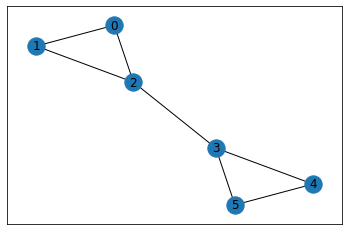

In [2]:
import networkx as nx
import numpy as np
%matplotlib inline

M = ["0,1,2",
"1,0,2",
"2,0,1,3",
"3,2,4,5",
"4,3,5",
"5,3,4"
    ]
G=nx.parse_adjlist(M, nodetype=int, delimiter=",")
nx.draw_networkx(G)

#G = nx.karate_club_graph()
#nx.draw_networkx(G)

In [44]:
for node in [0,1,2]:
    G.nodes[node]['community'] = 0
for node in [3,4,5]:
    G.nodes[node]['community'] = 1

In [47]:
G.nodes[1]['community']

0

In [52]:
# The community label of a node can be accessed by G[node_id]['community']
# The degree of a node: G.degree[node_id]
# The neighbors of a node: G.neighbors(node_id)
# Number of edges between 2 nodes: G.number_of_edges(node_1, node_2)
def compute_modularity(G):
    ''' input: G:nx.Graph 
        output: Q (modularity metric)
    '''
    
    m = len(G.edges)
    Q = 0

    for i in G.nodes :
        for j in G.nodes:
            if G.nodes[i]['community'] == G.nodes[j]['community']:
                Q += G.number_of_edges(i, j) - G.degree[i]*G.degree[j]/(2 * m)
    return Q/(2 * m)

In [53]:
compute_modularity(G)

0.3571428571428571

## Question 2

Suppose that you have an undirected social graph G = (U, V), where U - set of nodes, V - set of edges.

<img src="graph.png" width="400">

#### Question

Compute betweenness for the graph G and output the communities for the following betweenness threshold : 4, 6.